In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [1]:
import pandas as pd 
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import rhinoMorph
from collections import Counter 

In [2]:
def read_data(filename, encoding = 'cp949'):
    with open(filename, 'r', encoding = encoding ) as f:
        data =[line.split("\t") for line in f.read().splitlines()]
        data = data[1:]
    return data
  #읽기 함수

In [3]:
def write_data(data, filename, encoding = 'cp949'):
    with open(filename, 'w', encoding = encoding ) as f:
        f.write(data)
# 쓰기함수

In [6]:
data = read_data('/Users/Moon/Desktop/빅데이터 청년인재/NLP/pytest/rathings.txt',encoding = 'cp949')
print(len(data))


197514


In [7]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

In [8]:
from sklearn.model_selection import train_test_split
#train과 test모델을 분리 

In [9]:
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify = data_senti)

In [10]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq : ', train_data_senti_freq)
# 약 5:5의 비율로 구분이 된 것을 확인할 수 있음
# train의 senti가 약 5:5로 구분된것을 볼 수 있음

train_data_senti_freq :  Counter({'1': 74097, '0': 74038})


In [11]:
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq : ', test_data_senti_freq)
# test의 senti가 약 5:5로 구분된 것을 볼 수 있음 

test_data_senti_freq :  Counter({'1': 24699, '0': 24680})


#### 수동으로 train과 test를 분리

In [12]:
import random

In [15]:
random.shuffle(data)
data_70 = int(len(data) * 0.7)
#전체 데이터크기의 70% 숫자를 찾음 
train_data = data[:data_70]
# data_70이 int임으로 
test_data = data[data_70:]

print('train data length : ', len(train_data))
print('test data lenght : ', len(test_data))

train data length :  138259
test data lenght :  59255


##### DTM(Document Term Matrix)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
mat = CountVectorizer(min_df = 5).fit(train_data_text)
#min_df : 문서에서 기준을 넘지못하는 단어는 제외하는 기능 
#mat는 프레임을 지정해주며 동일한 컬럼명이 올 수 있도록 해줌 
#train과 test에 맞게 두번을 하는것이 아니라 train에서 정한 프레임을 그대로 
#test에도 적용을 하여 도출 
X_train = mat.transform(train_data_text)
#X_train에 mat의 프레임을 넣은 Sparse Matrix를 생성 
print('X_train : \n' , repr(X_train))

X_train : 
 <148135x11661 sparse matrix of type '<class 'numpy.int64'>'
	with 824129 stored elements in Compressed Sparse Row format>


In [23]:
feature_names = mat.get_feature_names()
print('특성 개수 : ', len(feature_names))
print('처음 20개 특성 : \n', feature_names[:20] )
#feature_names : 컬럼개수가 11661
#20개의 컬럼을 뽑아줌

특성 개수 :  11661
처음 20개 특성 : 
 ['10점', '1빠', 'cgv', 'ebs', 'kbs', 'la', 'mb', 'mbc', 'naver', 'new', 'ok', 'sbs', 'sns', 'tv', 'usb', 'ㄴㄴ', 'ㄷㄷ', 'ㅂㄷㅂㄷ', 'ㅂㅅ', 'ㅅㅂ']


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [25]:
y_train = pd.Series(train_data_senti)
#라벨값을 시리즈로 변경 
#시리즈가 리스트라고 생각을 하면됨 
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
#로지스틱 회귀모델에 train데이터를 학습 
#파라미터는 자동으로 조정 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
X_test = mat.transform(test_data_text)
#test도 기존의 mat프레임에 넣어줌
y_test = pd.Series(test_data_senti)
#라벨값을 시리즈로 변경 
#중요 중요 중요 중요 중요
#mat로 지정을 하지않으면 X_test와 X_train이 가지고 있는 칼럼이름(단어)가 달라서 학습이 안됨
#즉 mat를 지정하면 동일한 프레임안에서 빈도를 표현할 수 있으며 제대로된 학습이 안됨 
#시리즈와 리스트는 컬럼이 한개인것은 동일하며 가로가 리스트, 세로가 시리즈라고 함

print('테스트 데이터 점수 : ', lr.score(X_test, y_test))
#학습된 모델에 새로운 test데이터를 넣어주어 모델의 성능을 파악 

테스트 데이터 점수 :  0.8068814678304542


In [31]:
#학습된 모델을 다른환경에서도 사용을 하기위해서는 
#DTM Vect와 학습된 모델 두개를 가져와야한다
#이러한 것들을 저장하는 방법으로는 pickle을 사용 

In [34]:
rn = rhinoMorph.startRhino()

filepath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages
classpath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [36]:
new_input = '오늘은 정말 재미있는 하루구나!'
inputdata = []
morphed_input = rhinoMorph.onlyMorph_list(rn, 
                                            new_input, pos= ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morphed_input = ' '.join(morphed_input)

inputdata.append(morphed_input)
print('input data : ', inputdata)
#띄어쓰기를 기준으로 단어를 자름 

input data :  ['오늘 정말 재미있 하루']


In [38]:
X_input = mat.transform(inputdata)
result = lr.predict(X_input)

if result == '0':
    print('부정적인 글입니다.')
else:
    print('긍정적인 글입니다.')
#하나의 문장을 모델에 넣어서 나온 결과가 0이면 부정으로 출력이고 1이면 긍정으로 출력

긍정적인 글입니다.


#### Deep Learning

In [39]:
#mnist : 숫자 구분데이터 
#numpy의 array형태로 전처리가 완료되어있음

In [40]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [41]:
print(train_images.shape)
#데이터가 기존에 보던 2차원이 아닌 3차원 
#6만개의 데이터로 구성되어있으며 28*28로 구성되어 있는 이미지데이터
#28*28이 열과 행으로 구성되어있다고 생각을 하지말고 전부 column으로 생각

(60000, 28, 28)


In [46]:
print(train_images[1])
#숫자2를 RGB로 표현하여 희소행렬처럼 표현 하여 이미지를 인식함 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

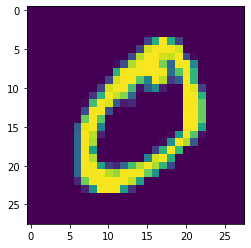

In [47]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

In [48]:
my_slice = test_images[0:100]
my_slice = test_images[0:100, 0:28, 0:28]
my_slice = test_images[0:100, :,:]
#위의 코드가 전부 같다
print(my_slice.shape)
#100개의 데이터를 추출했으며 해당 데이터의 형태는 28*28 

(100, 28, 28)


In [54]:
print(len(train_labels))
print(train_labels)
set(train_labels)
#label이 고유하게 0~9까지 있는것을 확인을 할 수 있다
#즉 output이 최종적으로 10개

60000
[5 0 4 ... 5 6 8]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [55]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [57]:
model = models.Sequential()
#모델 초기화 
#모델을 계속 쌓아나간다고 생각

In [60]:
model.add(layers.Dense(256, activation = 'relu', input_shape = (28*28,)))
#입력층의 노드는 이미 데이터의 input인 28*28로 결정
#입력층은 이미 설정되어있으므로 은닉층을 설정 
#256부분에는 어떤 숫자나 상관이 없으나 보통은 input보다 높게 2의 제곱형태로 넣는다
#input_shape : input noded의 개수 
#input_shape = (특성의 수 , 샘플의 수 , 데이터 셋 크기 ) 보통 데이터셋 크기는 지정을 안하는 것이 좋다 

In [61]:
model.add(layers.Dense(10, activation = 'softmax'))
#최종 출력층 , label이 0~9이므로 10개
#Dense : 완전연결을 뜻함 

In [64]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#loss : 신경망의 성능을 알려주는 CostFunction을 적는 부분 
#opitmizer : 최적값을 찾아내기위해 가중치(w)를 조정하는 방법을 적는 부분 
#metrics : train과 test과정을 모니터링 할 지표 
#좋은 모델 기준 : 오차가 적은 모델을 적은 모델이라고 정의
#하이퍼파라미터 종류 찾기 : keras losses, keras optimizer라고 적으면 됨 

In [65]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255
#보통은 0~1사이로 나오는게 좋다고 하셨음으로 255로 나누면 최대 1 최소 0으로 됨 

In [66]:
import numpy as np

In [67]:
np.set_printoptions(linewidth = 310)
print(test_images[1])
#변환이 잘된것을 확인할 수 있음 

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.      

In [68]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [69]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2475 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0944 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0637 - acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0455 - acc: 0.98580s - loss: 0.0447 - acc: 
Epoch 5/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0338 - acc: 0.9893


In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc :', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0990 - acc: 0.9722
test_acc : 0.9722
